In [1]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Start Python Imports
import math, time, random, datetime, re, string, zipfile
import pandas as pd
import numpy as np

# Preprocessing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv('D:\File Backup S1 Edisi Ke 2\Aplikasi Sentiment Analisis Ulasan Pelanggan Tokopedia\Datasets\dataset_review_tokped_final_cleaned.csv')

In [3]:
df

,Review,Rating,Sentiment,tokenization,Review_Normalized,df_token_stemm,Review_clean
0,enak kuacinya,5,Positive,"['enak', 'kuacinya']","['enak', 'kuacinya']","['enak', 'kuaci']",enak kuaci
1,pengiriman cepat packing bagus sesuai pesanan ...,5,Positive,"['pengiriman', 'cepat', 'packing', 'bagus', 's...","['pengiriman', 'cepat', 'pengemasan', 'bagus',...","['kirim', 'cepat', 'emas', 'bagus', 'sesuai', ...",kirim cepat emas bagus sesuai pesan coba terim...
2,pengemasan luar biasa baik untuk rasa menurut ...,4,Negative,"['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['emas', 'luar', 'biasa', 'baik', 'untuk', 'ra...",emas dominan asli asli kuaci varian dominan as...
3,terimakasih min,5,Positive,"['terimakasih', 'min']","['terima kasih', 'minimal']","['terima kasih', 'minimal']",terima kasih minimal
4,udah order untuk kesekian kali jos,5,Positive,"['udah', 'order', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'sekian', 'kali', '...",beli sekian kali mantap
...,...,...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,Positive,"['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...",seller responsif coba buka
4056,imut banget packing aman,5,Positive,"['imut', 'banget', 'packing', 'aman']","['imut', 'banget', 'pengemasan', 'aman']","['imut', 'banget', 'emas', 'aman']",imut banget emas aman
4057,good product trusted seller,5,Positive,"['good', 'product', 'trusted', 'seller']","['good', 'produk', 'dipercaya', 'seller']","['good', 'produk', 'percaya', 'seller']",good produk percaya seller
4058,sudah beli yg ke,5,Positive,"['sudah', 'beli', 'yg', 'ke']","['sudah', 'beli', 'yang', 'ke']","['sudah', 'beli', 'yang', 'ke']",beli


In [4]:
df["Review"].iloc[2009]

'kembali ke awal rasanya'

In [5]:
#conver data to lowercase
df['Sentiment'] = df['Sentiment'].str.lower()
df

,Review,Rating,Sentiment,tokenization,Review_Normalized,df_token_stemm,Review_clean
0,enak kuacinya,5,positive,"['enak', 'kuacinya']","['enak', 'kuacinya']","['enak', 'kuaci']",enak kuaci
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,"['pengiriman', 'cepat', 'packing', 'bagus', 's...","['pengiriman', 'cepat', 'pengemasan', 'bagus',...","['kirim', 'cepat', 'emas', 'bagus', 'sesuai', ...",kirim cepat emas bagus sesuai pesan coba terim...
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,"['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['emas', 'luar', 'biasa', 'baik', 'untuk', 'ra...",emas dominan asli asli kuaci varian dominan as...
3,terimakasih min,5,positive,"['terimakasih', 'min']","['terima kasih', 'minimal']","['terima kasih', 'minimal']",terima kasih minimal
4,udah order untuk kesekian kali jos,5,positive,"['udah', 'order', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'sekian', 'kali', '...",beli sekian kali mantap
...,...,...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,positive,"['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...",seller responsif coba buka
4056,imut banget packing aman,5,positive,"['imut', 'banget', 'packing', 'aman']","['imut', 'banget', 'pengemasan', 'aman']","['imut', 'banget', 'emas', 'aman']",imut banget emas aman
4057,good product trusted seller,5,positive,"['good', 'product', 'trusted', 'seller']","['good', 'produk', 'dipercaya', 'seller']","['good', 'produk', 'percaya', 'seller']",good produk percaya seller
4058,sudah beli yg ke,5,positive,"['sudah', 'beli', 'yg', 'ke']","['sudah', 'beli', 'yang', 'ke']","['sudah', 'beli', 'yang', 'ke']",beli


In [6]:
df["Review"].iloc[2009]

'kembali ke awal rasanya'

In [7]:
df.isnull().sum()

Review                2
Rating                0
Sentiment             0
tokenization          0
Review_Normalized     0
df_token_stemm        0
Review_clean         11
dtype: int64

In [8]:
#df = df.dropna(inplace=True)
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.reset_index()
print(df.shape)
#Removes duplicates in place
#df.drop_duplicates(keep=False, inplace=True)
#print(df.shape) 
#df

(4049, 8)


In [11]:
df['Sentiment'].unique()

array(['positive', 'negative', ' negative', ' positive', ' negative '],
      dtype=object)

In [12]:
#remove all whitespace in colomn labelling
def remove_whitespace_multiple(text):
    return text.replace(" ", "")

df['Sentiment'] = df['Sentiment'].apply(remove_whitespace_multiple)

In [13]:
df['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [14]:
positive = df.loc[df['Sentiment'] == 'positive']

In [15]:
positive['Sentiment'].value_counts()

positive    3551
Name: Sentiment, dtype: int64

In [16]:
negative = df.loc[df['Sentiment'] == 'negative']

In [17]:
negative['Sentiment'].value_counts()

negative    498
Name: Sentiment, dtype: int64

<AxesSubplot:>

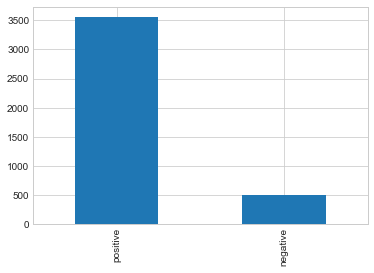

In [18]:
pd.value_counts(df['Sentiment']).plot.bar()

In [19]:
def apply_sentiment(Sentiment):
    if(Sentiment=='positive'):
        return 1
    else: 
        return 0

In [20]:
df['Sentiment']=df['Sentiment'].apply(apply_sentiment)
#df.drop(['Rating'],axis=1,inplace=True)

In [21]:
df

,index,Review,Rating,Sentiment,tokenization,Review_Normalized,df_token_stemm,Review_clean
0,0,enak kuacinya,5,1,"['enak', 'kuacinya']","['enak', 'kuacinya']","['enak', 'kuaci']",enak kuaci
1,1,pengiriman cepat packing bagus sesuai pesanan ...,5,1,"['pengiriman', 'cepat', 'packing', 'bagus', 's...","['pengiriman', 'cepat', 'pengemasan', 'bagus',...","['kirim', 'cepat', 'emas', 'bagus', 'sesuai', ...",kirim cepat emas bagus sesuai pesan coba terim...
2,2,pengemasan luar biasa baik untuk rasa menurut ...,4,0,"['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['pengemasan', 'luar', 'biasa', 'baik', 'untuk...","['emas', 'luar', 'biasa', 'baik', 'untuk', 'ra...",emas dominan asli asli kuaci varian dominan as...
3,3,terimakasih min,5,1,"['terimakasih', 'min']","['terima kasih', 'minimal']","['terima kasih', 'minimal']",terima kasih minimal
4,4,udah order untuk kesekian kali jos,5,1,"['udah', 'order', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'kesekian', 'kali',...","['sudah', 'beli', 'untuk', 'sekian', 'kali', '...",beli sekian kali mantap
...,...,...,...,...,...,...,...,...
4044,4055,seller sangat responsif rasa belum dicoba kare...,5,1,"['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...","['seller', 'sangat', 'responsif', 'rasa', 'bel...",seller responsif coba buka
4045,4056,imut banget packing aman,5,1,"['imut', 'banget', 'packing', 'aman']","['imut', 'banget', 'pengemasan', 'aman']","['imut', 'banget', 'emas', 'aman']",imut banget emas aman
4046,4057,good product trusted seller,5,1,"['good', 'product', 'trusted', 'seller']","['good', 'produk', 'dipercaya', 'seller']","['good', 'produk', 'percaya', 'seller']",good produk percaya seller
4047,4058,sudah beli yg ke,5,1,"['sudah', 'beli', 'yg', 'ke']","['sudah', 'beli', 'yang', 'ke']","['sudah', 'beli', 'yang', 'ke']",beli


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              4049 non-null   int64 
 1   Review             4049 non-null   object
 2   Rating             4049 non-null   int64 
 3   Sentiment          4049 non-null   int64 
 4   tokenization       4049 non-null   object
 5   Review_Normalized  4049 non-null   object
 6   df_token_stemm     4049 non-null   object
 7   Review_clean       4049 non-null   object
dtypes: int64(3), object(5)
memory usage: 253.2+ KB


In [23]:
print(df)

      index                                             Review  Rating  \
0         0                                      enak kuacinya       5   
1         1  pengiriman cepat packing bagus sesuai pesanan ...       5   
2         2  pengemasan luar biasa baik untuk rasa menurut ...       4   
3         3                                    terimakasih min       5   
4         4                 udah order untuk kesekian kali jos       5   
...     ...                                                ...     ...   
4044   4055  seller sangat responsif rasa belum dicoba kare...       5   
4045   4056                           imut banget packing aman       5   
4046   4057                        good product trusted seller       5   
4047   4058                                  sudah beli yg ke        5   
4048   4059                                    byk campurannya       4   

      Sentiment                                       tokenization  \
0             1                          

In [24]:
clf1 = MultinomialNB()
clf2 = svm.SVC(kernel='linear', C=1.0,random_state=2)
clf3 = DecisionTreeClassifier(random_state=2)

In [25]:
estimators = [('bayes', MultinomialNB()),
               ('svm', svm.SVC(kernel='linear', C=1.0,random_state=2)),
               ('dt', DecisionTreeClassifier(random_state=2))]

In [26]:
clf4 = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression())

In [27]:
#tf-Idf vectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01) 
#x1 = vectorizer.fit_transform(df['Review_clean'].dropna().values.astype('U')) 
#x1 = vectorizer.fit_transform(df['Review_clean']) 
x1 = df['Review_clean']
y1 =  df['Sentiment']

In [28]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,y1,
                                                 test_size=0.2,
                                                 random_state = 42)

In [29]:
data_train = pd.DataFrame()
data_train['Review_clean'] = X1_train
data_train['Sentiment'] = y1_train

data_test = pd.DataFrame()
data_test['Review_clean'] = X1_test
data_test['Sentiment'] = y1_test

In [30]:
vectorizer.fit(df['Review_clean'])
data_train_x = vectorizer.transform(data_train['Review_clean']) 
data_test_x = vectorizer.transform(data_test['Review_clean'])

In [31]:
from collections import Counter
print(Counter(y1_train))
print(Counter(y1_test))

Counter({1: 2843, 0: 396})
Counter({1: 708, 0: 102})


# Implementation Model Naive Bayes

In [32]:
clf1.fit(data_train_x.toarray(), y1_train)

MultinomialNB()

In [33]:
clf1.score(data_test_x.toarray(),y1_test)

0.8888888888888888

In [34]:
pred_nb1 = clf1.predict(data_test_x.toarray())
acc_nb1 = metrics.accuracy_score(pred_nb1, y1_test)
print(str('{:04.2f}'.format(acc_nb1*100))+'%')

88.89%


In [35]:
## Matrics evaluation for classification Naive Bayes Scen 1
print(classification_report(y1_test, pred_nb1, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.83      0.15      0.25       102
    positive       0.89      1.00      0.94       708

    accuracy                           0.89       810
   macro avg       0.86      0.57      0.59       810
weighted avg       0.88      0.89      0.85       810



# Implementation Model Support Vector Machine

In [36]:
clf2.fit(data_train_x.toarray(), y1_train)

SVC(kernel='linear', random_state=2)

In [37]:
clf2.score(data_test_x.toarray(),y1_test)

0.8950617283950617

In [38]:
pred_svm1 = clf2.predict(data_test_x.toarray())
acc_svm1 = metrics.accuracy_score(pred_svm1, y1_test)
print(str('{:04.2f}'.format(acc_svm1*100))+'%')

89.51%


In [39]:
## Matrics evaluation for classification Support Vector Machines Scen 1
print(classification_report(y1_test, pred_svm1, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.79      0.23      0.35       102
    positive       0.90      0.99      0.94       708

    accuracy                           0.90       810
   macro avg       0.85      0.61      0.65       810
weighted avg       0.89      0.90      0.87       810



# Implementation Model Decision Tree

In [40]:
clf3.fit(data_train_x.toarray(), y1_train)

DecisionTreeClassifier(random_state=2)

In [41]:
clf3.score(data_test_x.toarray(),y1_test)

0.8703703703703703

In [42]:
pred_dt1 = clf3.predict(data_test_x.toarray())
acc_dt1 = metrics.accuracy_score(pred_dt1, y1_test)
print(str('{:04.2f}'.format(acc_dt1*100))+'%')

87.04%


In [43]:
## Matrics evaluation for classification decision tree Scen 1
print(classification_report(y1_test, pred_dt1, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.48      0.35      0.41       102
    positive       0.91      0.94      0.93       708

    accuracy                           0.87       810
   macro avg       0.70      0.65      0.67       810
weighted avg       0.86      0.87      0.86       810



# Implementation Stacking Model

In [44]:
clf4.fit(data_train_x.toarray(), y1_train)

StackingClassifier(estimators=[('bayes', MultinomialNB()),
                               ('svm', SVC(kernel='linear', random_state=2)),
                               ('dt', DecisionTreeClassifier(random_state=2))],
                   final_estimator=LogisticRegression())

In [45]:
clf4.score(data_test_x.toarray(),y1_test)

0.8962962962962963

In [46]:
pred_stacking1 = clf4.predict(data_test_x.toarray())
acc_stacking1 = metrics.accuracy_score(pred_stacking1, y1_test)
print(str('{:04.2f}'.format(acc_stacking1*100))+'%')

89.63%


In [47]:
## Matrics evaluation for classification stacking ensemble Scen 1
print(classification_report(y1_test, pred_stacking1, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.74      0.27      0.40       102
    positive       0.90      0.99      0.94       708

    accuracy                           0.90       810
   macro avg       0.82      0.63      0.67       810
weighted avg       0.88      0.90      0.87       810



# Applying Oversampling

In [48]:
X2_train_over,X2_test_over,y2_train_over,y2_test_over = train_test_split(x1,y1,
                                                 test_size=0.20,
                                                 random_state = 42)

In [49]:
data_train_over = pd.DataFrame()
data_train_over['Review_clean'] = X2_train_over
data_train_over['Sentiment'] = y2_train_over

data_test_over = pd.DataFrame()
data_test_over['Review_clean'] = X2_test_over
data_test_over['Sentiment'] = y2_test_over

In [50]:
vectorizer.fit(df['Review_clean'])
data_train_x_over = vectorizer.transform(data_train_over['Review_clean']) 
data_test_x_over = vectorizer.transform(data_test_over['Review_clean'])

In [51]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler, SMOTE
sm = SMOTE(sampling_strategy='not majority') 
X_over,Y_over = sm.fit_resample(data_train_x_over,y2_train_over)

In [52]:
print('Resampled dataset shape %s' % Counter(Y_over))

Resampled dataset shape Counter({1: 2843, 0: 2843})


## Naive Bayes Oversampling

In [53]:
clf1.fit(X_over.toarray(), Y_over)

MultinomialNB()

In [54]:
clf1.score(data_test_x_over.toarray(),y2_test_over)

0.7851851851851852

In [55]:
pred_nb1_over = clf1.predict(data_test_x_over.toarray())
acc_nb1_over = metrics.accuracy_score(pred_nb1_over, y2_test_over)
print(str('{:04.2f}'.format(acc_nb1_over*100))+'%')

78.52%


In [56]:
## Matrics evaluation for classification Naive Bayes Scen 1
print(classification_report(y2_test_over, pred_nb1_over, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.33      0.72      0.46       102
    positive       0.95      0.80      0.87       708

    accuracy                           0.79       810
   macro avg       0.64      0.76      0.66       810
weighted avg       0.87      0.79      0.81       810



## Support Vector Machine Oversampling

In [57]:
clf2.fit(X_over.toarray(), Y_over)

SVC(kernel='linear', random_state=2)

In [58]:
clf2.score(data_test_x_over.toarray(),y2_test_over)

0.7962962962962963

In [59]:
pred_svm1_over = clf2.predict(data_test_x_over.toarray())
acc_svm1_over = metrics.accuracy_score(pred_svm1_over, y2_test_over)
print(str('{:04.2f}'.format(acc_svm1_over*100))+'%')

79.63%


In [60]:
## Matrics evaluation for classification Support Vector Machines Scen 1
print(classification_report(y2_test_over, pred_svm1_over, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.35      0.75      0.48       102
    positive       0.96      0.80      0.87       708

    accuracy                           0.80       810
   macro avg       0.66      0.78      0.68       810
weighted avg       0.88      0.80      0.82       810



## Decision Tree Oversampling

In [61]:
clf3.fit(X_over.toarray(), Y_over)

DecisionTreeClassifier(random_state=2)

In [62]:
clf3.score(data_test_x_over.toarray(),y2_test_over)

0.8160493827160494

In [63]:
pred_dt1_over = clf3.predict(data_test_x_over.toarray())
acc_dt1_over = metrics.accuracy_score(pred_dt1_over, y2_test_over)
print(str('{:04.2f}'.format(acc_dt1_over*100))+'%')

81.60%


In [64]:
## Matrics evaluation for classification decision tree Scen 1
print(classification_report(y2_test_over, pred_dt1_over, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.36      0.57      0.44       102
    positive       0.93      0.85      0.89       708

    accuracy                           0.82       810
   macro avg       0.64      0.71      0.66       810
weighted avg       0.86      0.82      0.83       810



## Stacking Oversampling

In [65]:
clf4.fit(X_over.toarray(), Y_over)

StackingClassifier(estimators=[('bayes', MultinomialNB()),
                               ('svm', SVC(kernel='linear', random_state=2)),
                               ('dt', DecisionTreeClassifier(random_state=2))],
                   final_estimator=LogisticRegression())

In [66]:
clf4.score(data_test_x_over.toarray(),y2_test_over)

0.8358024691358025

In [67]:
pred_stacking1_over = clf4.predict(data_test_x_over.toarray())
acc_stacking1_over = metrics.accuracy_score(pred_stacking1_over, y2_test_over)
print(str('{:04.2f}'.format(acc_stacking1_over*100))+'%')

83.58%


In [68]:
## Matrics evaluation for classification stacking ensemble Scen 1
print(classification_report(y2_test_over, pred_stacking1_over, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.40      0.64      0.49       102
    positive       0.94      0.86      0.90       708

    accuracy                           0.84       810
   macro avg       0.67      0.75      0.70       810
weighted avg       0.88      0.84      0.85       810



# Applying Undersampling

In [69]:
X3_train_under,X3_test_under,y3_train_under,y3_test_under = train_test_split(x1,y1,
                                                 test_size=0.20,
                                                 random_state = 42)

In [70]:
data_train_under = pd.DataFrame()
data_train_under['Review_clean'] = X3_train_under
data_train_under['Sentiment'] = y3_train_under

data_test_under = pd.DataFrame()
data_test_under['Review_clean'] = X3_test_under
data_test_under['Sentiment'] = y3_test_under

In [71]:
vectorizer.fit(df['Review_clean'])
data_train_x_under = vectorizer.transform(data_train_under['Review_clean']) 
data_test_x_under = vectorizer.transform(data_test_under['Review_clean'])

In [72]:
# RandomOverSampler to handle imbalanced data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority') 
X_under,Y_under = rus.fit_resample(data_train_x_under,y3_train_under)

In [73]:
print('Resampled dataset shape %s' % Counter(Y_under))

Resampled dataset shape Counter({0: 396, 1: 396})


## Naive Bayes Undersampling

In [74]:
clf1.fit(X_under.toarray(), Y_under)

MultinomialNB()

In [75]:
clf1.score(data_test_x_under.toarray(),y3_test_under)

0.7617283950617284

In [76]:
pred_nb1_under = clf1.predict(data_test_x_under.toarray())
acc_nb1_under = metrics.accuracy_score(pred_nb1_under, y3_test_under)
print(str('{:04.2f}'.format(acc_nb1_under*100))+'%')

76.17%


In [77]:
## Matrics evaluation for classification Naive Bayes Scen 1
print(classification_report(y3_test_under, pred_nb1_under, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.32      0.76      0.45       102
    positive       0.96      0.76      0.85       708

    accuracy                           0.76       810
   macro avg       0.64      0.76      0.65       810
weighted avg       0.88      0.76      0.80       810



## Support Vector Machine Undersampling

In [78]:
clf2.fit(X_under.toarray(), Y_under)

SVC(kernel='linear', random_state=2)

In [79]:
clf2.score(data_test_x_under.toarray(),y3_test_under)

0.7567901234567901

In [80]:
pred_svm1_under = clf2.predict(data_test_x_under.toarray())
acc_svm1_under = metrics.accuracy_score(pred_svm1_under, y3_test_under)
print(str('{:04.2f}'.format(acc_svm1_under*100))+'%')

75.68%


In [81]:
## Matrics evaluation for classification Support Vector Machines Scen 1
print(classification_report(y3_test_under, pred_svm1_under, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.32      0.82      0.46       102
    positive       0.97      0.75      0.84       708

    accuracy                           0.76       810
   macro avg       0.64      0.79      0.65       810
weighted avg       0.89      0.76      0.79       810



## Decision Tree Undersampling

In [82]:
clf3.fit(X_under.toarray(), Y_under)

DecisionTreeClassifier(random_state=2)

In [83]:
clf3.score(data_test_x_under.toarray(),y3_test_under)

0.674074074074074

In [84]:
pred_dt1_under = clf3.predict(data_test_x_under.toarray())
acc_dt1_under = metrics.accuracy_score(pred_dt1_under, y3_test_under)
print(str('{:04.2f}'.format(acc_dt1_under*100))+'%')

67.41%


In [85]:
## Matrics evaluation for classification decision tree Scen 1
print(classification_report(y3_test_under, pred_dt1_under, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.23      0.68      0.34       102
    positive       0.94      0.67      0.78       708

    accuracy                           0.67       810
   macro avg       0.58      0.68      0.56       810
weighted avg       0.85      0.67      0.73       810



## Stacking Undersampling

In [86]:
clf4.fit(X_under.toarray(), Y_under)

StackingClassifier(estimators=[('bayes', MultinomialNB()),
                               ('svm', SVC(kernel='linear', random_state=2)),
                               ('dt', DecisionTreeClassifier(random_state=2))],
                   final_estimator=LogisticRegression())

In [87]:
clf4.score(data_test_x_under.toarray(),y3_test_under)

0.7802469135802469

In [88]:
pred_stacking1_under = clf4.predict(data_test_x_under.toarray())
acc_stacking1_under = metrics.accuracy_score(pred_stacking1_under, y3_test_under)
print(str('{:04.2f}'.format(acc_stacking1_under*100))+'%')

78.02%


In [89]:
## Matrics evaluation for classification stacking ensemble Scen 1
print(classification_report(y3_test_under, pred_stacking1_under, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.35      0.83      0.49       102
    positive       0.97      0.77      0.86       708

    accuracy                           0.78       810
   macro avg       0.66      0.80      0.67       810
weighted avg       0.89      0.78      0.81       810



In [95]:
X4_train_over,X4_test_over,y4_train_over,y4_test_over = train_test_split(X_oversampling,Y_oversampling,
                                                 test_size=0.20,
                                                 random_state = 42)

In [119]:
X5_train_under,X5_test_under,y5_train_under,y5_test_under = train_test_split(X_undersampling,Y_undersampling,
                                                 test_size=0.20,
                                                 random_state = 42)